# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
!curl --header "Host: doc-14-as-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/" --header "Cookie: AUTH_6d57tlmd151rhrgo8ik3ogr8o2g7q8kk_nonce=luqkmvm7uritk" --header "Connection: keep-alive" "https://doc-14-as-docs.googleusercontent.com/docs/securesc/fev9g1e953f8o51km3me7sgfgsd0sbe5/8svmsh8a8bcvnsl99jdjfb8mi3be8sfp/1650441750000/00484516897554883881/10673234880569198624/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&ax=ACxEAsbGwdohKI4ajJNnFFLbXah6AplHRO0yJO5WjJ0gI0jSkR7L4JrvKhObVRbgT6iOrarGbrdH3AamA1r7W-yVaUKSWjfc4OcZ6yrij3-sG8Zvm0G8j-Rn5tCiF_tatR1GeCAb_n-TsoerG1cLtx-r-zyhqRSwCk9MOY_LIOoydsY1AX4cX6dVyJ3W94rdsQ-d3E8o09SHwDHMDQOIKpXZOViZI6GUEpJG2BAObPXPKDtqz2ck48n-xLoZqIJTHiWmYZ5Vy9IpOPkp2V0MQwV4unitlOfnbFqlKtIn0TRiTbtBSO80cRH8H6oaFVB3LwUPR2M330uGo9kH88YtpEM5jDxA2epet3CVnKMKwnu014d0dWy5w2uiywUm5W0C8uWpK8t0WgCdglu0GSPFu4_YFqCFftTCxDQI_lruUY31TetedDAePAFkLdicEY2BVjUDmb0aH-fxa9w1KkhozTzdsp8GufGUSLfYjt_4pfsrgdv8MU_ktVnLs3cunrGxGlfTNsxFJlH_IqLEMfe8BfbuO8yvzYZK4MPt4JubU9OpWYdwem6wXosAhFCpirLCUa43DdjSukUmzqtcVa0hkDpXqPL-z1xnMFUafrCWK_qmvlZf0oID7ZcqUnDlrSD_dvjQbUN7cvRprf7FuqVzyBXRTGuKjrd6d-sUn7dtYiAOUd5wNWEZZ11sRf4tu89JGn0Srn2g5oYae4EF2jKPQVQe9LYYyZK9Fu4ZmErsaf0uxQ&authuser=0&nonce=luqkmvm7uritk&user=10673234880569198624&hash=hm6uchn9nhck5fs08mjcq1u2fgg30njh" -L -o "ratings_train.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  859k  100  859k    0     0  3642k      0 --:--:-- --:--:-- --:--:-- 3627k


In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [5]:
k =np.sort(data.item_id.values)
miss_item = []
for i in range(data.item_id.values.max()+1):
  if i in k:
    pass
  else:
    miss_item.append(i)

k =np.sort(data.user_id.values)
miss_user = []
for i in range(data.user_id.values.max()+1):
  if i in k:
    pass
  else:
    miss_user.append(i)


In [6]:
data.item_id.values.max(),data.user_id.values.max()

(1680, 942)

In [7]:
miss_item

[709,
 1233,
 1308,
 1341,
 1350,
 1459,
 1484,
 1505,
 1562,
 1572,
 1582,
 1594,
 1599,
 1616,
 1617,
 1645,
 1664,
 1673,
 1675]

In [8]:
miss_user

[]

In [9]:
data.rating.min()

1

In [10]:
int(data['rating'][(data.user_id==471 )& (data.item_id ==0)])

5

In [11]:
adj = np.zeros((data.user_id.values.max() + 1, data.item_id.values.max()+1))
for act in range(data.user_id.values.max() + 1):
  for mov in range( data.item_id.values.max()+1):
    if len(data['rating'][(data.user_id== act )& (data.item_id == mov)])==0:
      adj[act, mov] = 0
    else:
      adj[act, mov] = int(data['rating'][(data.user_id== act )& (data.item_id == mov)])

In [12]:
np.array([1,3,5,6]).sort()

In [13]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd( adj , 
                              n_components= int((data.item_id.max()+data.user_id.max())**0.5),
                              n_iter=10,
                              random_state=None)

In [14]:
Sigma.shape

(51,)

<font color='red'>Create your adjacency matrix </font>

In [91]:
from scipy.sparse import csr_matrix
adjacency_matrix = adj# write your code of adjacency matrix here

In [92]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [93]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [18]:
"""from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)"""

'from sklearn.utils.extmath import randomized_svd\nimport numpy as np \nmatrix = np.random.random((20, 10))\nU, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)\nprint(U.shape)\nprint(Sigma.shape)\nprint(VT.T.shape)'

<font color='red'>Write your code for SVD decompostion</font>

In [ ]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

<font color='red'>Compute mean of ratings</font>

In [19]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return ratings.mean() 

In [20]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [21]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [22]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [23]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 

    mat = np.zeros(dim)
    #print(mat)
    #C = np.zeros(len(data.item_id.values)+1)

    return mat

In [24]:
dim=data.user_id.values.max()+1# give the number of dimensions for b_i (Here b_i corresponds to users) 
b_i=initialize(dim)


In [25]:
dim=data.item_id.values.max()+1# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

In [26]:
len(b_i)

943

<font color='cyan'>Grader function -3 </font>

In [27]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<font color='red'>Compute dL/db_i</font>

In [28]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    u_i = U[user_id]
    v_j = V.T[item_id]
    b = b_i[user_id]
    c = c_j[item_id]
    dL_b = 2*(alpha*b + b + c +mu + (u_i@v_j) - rating)
    return dL_b


In [29]:
adjacency_matrix = adj

<font color='cyan'>Grader function -4 </font>

In [30]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [31]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    u_i = U[user_id]
    #print("u_i_sub",u_i)
    v_j = V.T[item_id]
    #print("v_j_sub",v_j)
    b = b_i[user_id]
    #print("b_sub", b)
    c = c_j[item_id]
    #print("c_sub", c)
    dL_b = 2*(alpha*c + c + b +mu + (u_i@v_j) - rating)
    return dL_b
    return 


<font color='cyan'>Grader function - 5 </font>

In [32]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu, alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [33]:
from tqdm import tqdm
import time

In [38]:
dim=data.user_id.values.max()+1# give the number of dimensions for b_i (Here b_i corresponds to users) 
b_i=initialize(dim)
dim=data.item_id.values.max()+1# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)
lr = 0.001
mses = []
epochs= 40
start = time.time()
for epoch in tqdm(range(epochs)):
  mse = 0
  for i in range(U.shape[0]):
    for j in range(VT.T.shape[0]):
      if adj[i,j] !=0:
        db=derivative_db(i,j,adj[i,j],U,VT,mu, alpha)
        b_i[i] -= lr*db
        #print("db",db)
        dc = derivative_dc(i,j,adj[i,j],U,VT,mu, alpha)
        c_j[j] -= lr*dc
        #print("dc",dc)
        #print("mu",mu)
        #print("some",b_i[i]+c_j[j])
        #print("ji",U[i])
        #print("hi",VT.T[j])
        y_hat = mu+b_i[i] + c_j[j] + U[i]@VT.T[j]
        #print("yhat",y_hat)
        #print("pred",y_hat)
        #print("ground",adj[i,j])
        mse += np.round((adj[i,j]- y_hat)**2,3)
        #print("mse",mse)
      else:
        pass
  #print("mse_after_epoch",mse)
  mses.append(mse)

end = time.time()
print("time taken", end-start)
    

100%|██████████| 40/40 [01:40<00:00,  2.50s/it]

time taken 100.0414969921112


In [ ]:
len(mses)

In [45]:
np.array(mses).min()/(U.shape[0]*VT.T.shape[0])

0.0472395395358122

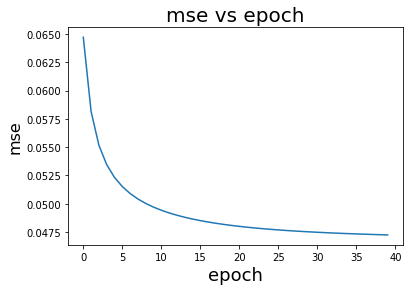

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), np.array(mses)/(U.shape[0]*VT.T.shape[0]))
plt.title('mse vs epoch', fontsize=20)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('mse', fontsize=16)
plt.show()

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [48]:
!curl --header "Host: doc-14-as-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/" --header "Cookie: AUTH_6d57tlmd151rhrgo8ik3ogr8o2g7q8kk_nonce=luqkmvm7uritk" --header "Connection: keep-alive" "https://doc-14-as-docs.googleusercontent.com/docs/securesc/fev9g1e953f8o51km3me7sgfgsd0sbe5/8svmsh8a8bcvnsl99jdjfb8mi3be8sfp/1650441750000/00484516897554883881/10673234880569198624/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&ax=ACxEAsbGwdohKI4ajJNnFFLbXah6AplHRO0yJO5WjJ0gI0jSkR7L4JrvKhObVRbgT6iOrarGbrdH3AamA1r7W-yVaUKSWjfc4OcZ6yrij3-sG8Zvm0G8j-Rn5tCiF_tatR1GeCAb_n-TsoerG1cLtx-r-zyhqRSwCk9MOY_LIOoydsY1AX4cX6dVyJ3W94rdsQ-d3E8o09SHwDHMDQOIKpXZOViZI6GUEpJG2BAObPXPKDtqz2ck48n-xLoZqIJTHiWmYZ5Vy9IpOPkp2V0MQwV4unitlOfnbFqlKtIn0TRiTbtBSO80cRH8H6oaFVB3LwUPR2M330uGo9kH88YtpEM5jDxA2epet3CVnKMKwnu014d0dWy5w2uiywUm5W0C8uWpK8t0WgCdglu0GSPFu4_YFqCFftTCxDQI_lruUY31TetedDAePAFkLdicEY2BVjUDmb0aH-fxa9w1KkhozTzdsp8GufGUSLfYjt_4pfsrgdv8MU_ktVnLs3cunrGxGlfTNsxFJlH_IqLEMfe8BfbuO8yvzYZK4MPt4JubU9OpWYdwem6wXosAhFCpirLCUa43DdjSukUmzqtcVa0hkDpXqPL-z1xnMFUafrCWK_qmvlZf0oID7ZcqUnDlrSD_dvjQbUN7cvRprf7FuqVzyBXRTGuKjrd6d-sUn7dtYiAOUd5wNWEZZ11sRf4tu89JGn0Srn2g5oYae4EF2jKPQVQe9LYYyZK9Fu4ZmErsaf0uxQ&authuser=0&nonce=luqkmvm7uritk&user=10673234880569198624&hash=hm6uchn9nhck5fs08mjcq1u2fgg30njh" -L -o "ratings_train.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [65]:
user_info = pd.read_csv("user_info.csv.txt")

In [66]:
user_info.columns

Index(['user_id', 'age', 'is_male', 'orig_user_id'], dtype='object')

In [67]:
is_male = user_info.is_male.values
user_info =user_info.drop(labels=['is_male','orig_user_id','user_id'], axis =1)

In [68]:
user_info.head()

,age
0,24
1,53
2,23
3,24
4,33


In [78]:
age = np.expand_dims(user_info.age.values,1)
age.shape

(943, 1)

In [80]:
user_features=np.hstack([U, age])

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
train_user, test_user, y_train, y_test = train_test_split(user_features, is_male, test_size =0.2, random_state =0)

In [84]:
scalar = StandardScaler().fit(train_user)
train_user = scalar.transform(train_user)
test_user = scalar.transform(test_user)

In [85]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_user, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


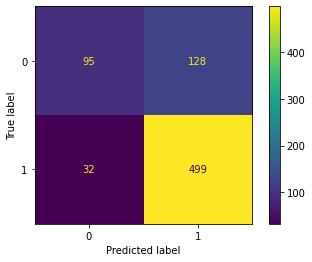

In [88]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, train_user, y_train)  
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


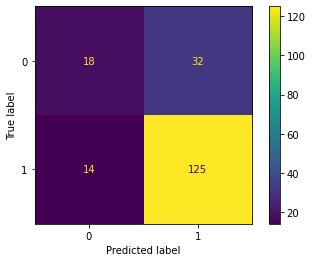

In [90]:
plot_confusion_matrix(clf, test_user, y_test)  
plt.show()